# Resale Flat Prices

## Summary
- Data source: [Resale flat prices based on registration date from Jan-2017 onwards](https://beta.data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view)
  - Time range: `Jan 2017 - Apr 2024`
  - The approximate floor area includes any recess area purchased, space adding item under HDB’s upgrading programmes, roof terrace, etc.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
spark

## Load Source Data

In [ ]:
source_df = spark.read.csv('/opt/data/datasets/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv', header=True, inferSchema=True)
source_df.show(10)

In [ ]:
source_df.write.format("delta").mode("overwrite").saveAsTable("resale_flat_prices")

In [ ]:
spark.sql("show tables").show()

In [ ]:
resale_flat_prices_df = spark.sql("SELECT * FROM resale_flat_prices")
resale_flat_prices_df.show(5)

In [ ]:
spark.sql("DESCRIBE resale_flat_prices").show()

## Data Exploration

In [ ]:
spark.sql("""
    select 
        count(distinct town) as town_number,
        count(distinct flat_type) as flat_type_number,
        count(distinct flat_model) as flat_model_number
    from resale_flat_prices
""").show()

In [47]:
spark.sql("""
    select distinct flat_type
    from resale_flat_prices
""").show()

+----------------+
|       flat_type|
+----------------+
|          3 ROOM|
|          1 ROOM|
|          4 ROOM|
|          2 ROOM|
|       EXECUTIVE|
|          5 ROOM|
|MULTI-GENERATION|
+----------------+



### Flat Number Per Town

In [24]:
avg_flats_df = spark.sql("""
    select 
        town,
        count(*) as flat_number
    from resale_flat_prices
    group by town
    order by 2 desc
""")

avg_flats_pd = avg_flats_df.toPandas()

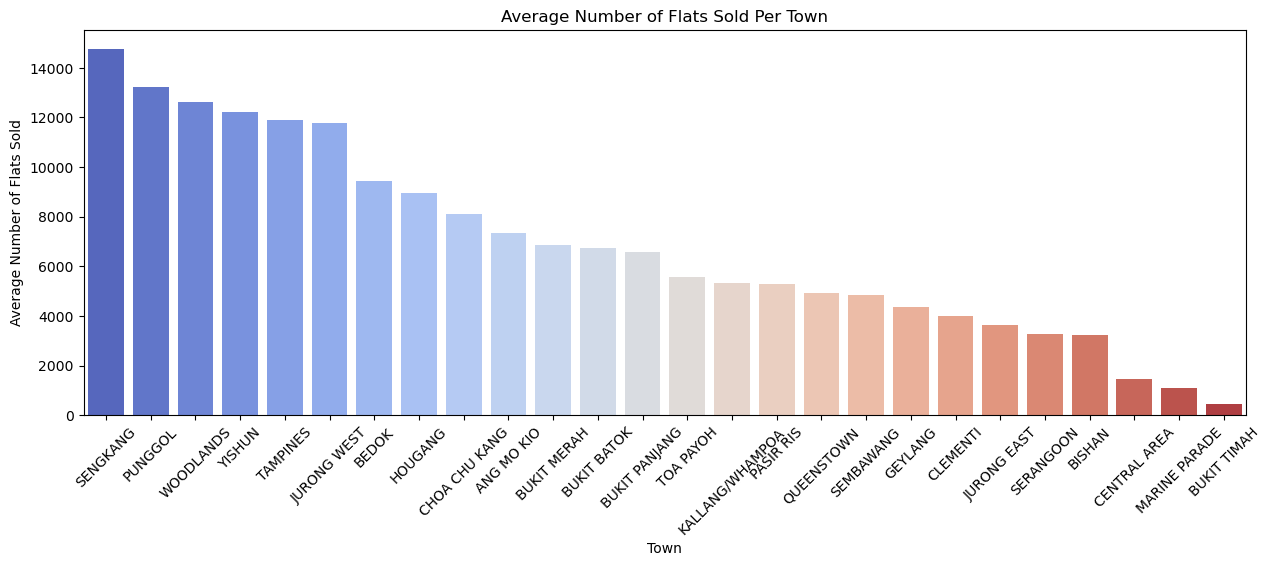

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(x='town', y='flat_number', hue='town', data=avg_flats_pd, palette='coolwarm')
plt.xlabel('Town')
plt.ylabel('Average Number of Flats Sold')
plt.title('Average Number of Flats Sold Per Town')
plt.xticks(rotation=45)
plt.show()

### Average Flat Price Per Town

#### 2024
- Until April

In [62]:
avg_price_df = spark.sql("""
    select 
        town,
        flat_type,
        avg(resale_price) as avg_price
    from resale_flat_prices    
    where 
        flat_type not in ('EXECUTIVE', 'MULTI-GENERATION') 
        and year(month) = '2024'
    group by town, flat_type
    order by avg_price desc 
""")

avg_price_pd = avg_price_df.toPandas()

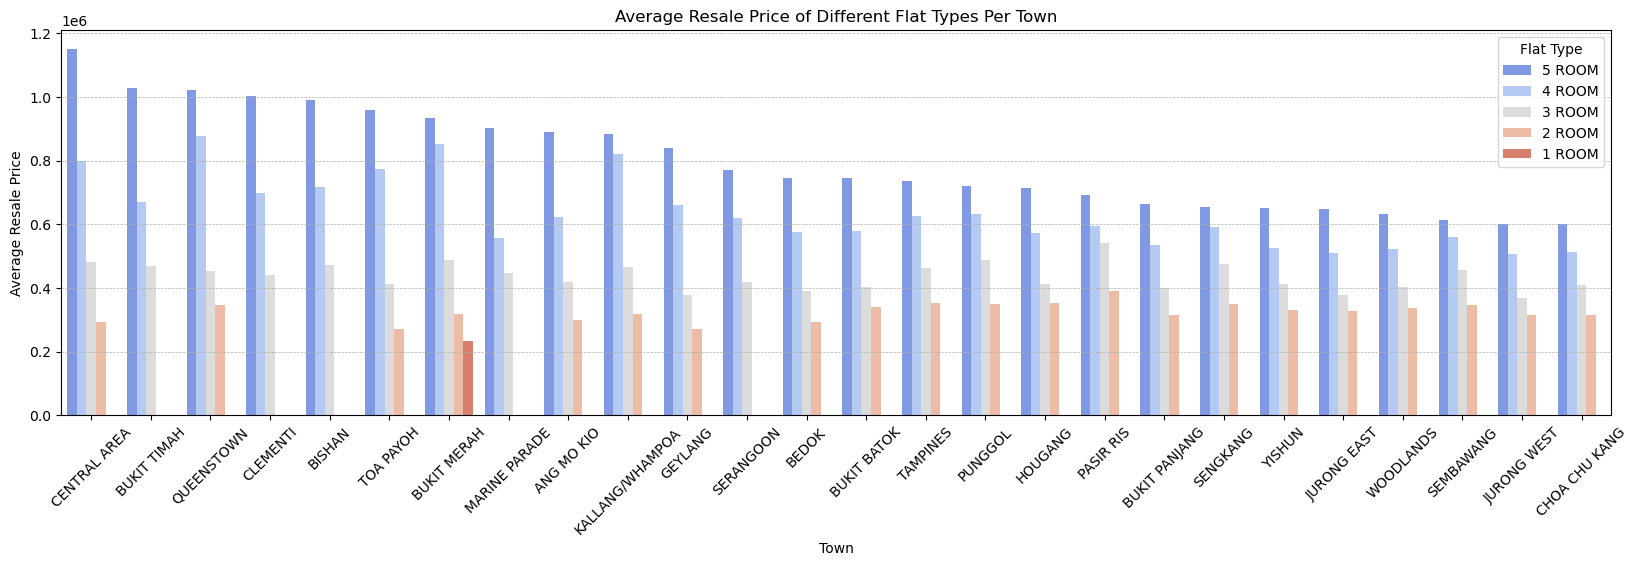

In [73]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x='town', y='avg_price', hue='flat_type', data=avg_price_pd, palette='coolwarm')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price of Different Flat Types Per Town')
plt.legend(title='Flat Type')
plt.xticks(rotation=45)

ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)  # Customize the grid lines

plt.show()